<a href="https://colab.research.google.com/github/hr-ge/Python-for-clinicians/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Pandas and Data Visualization

The purpose of this notebook is to introduce the reader to the package [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) as a tool to manage tabular data. Then, the basics of data visualization will be explained with built-in Pandas tools, as well as with the packages [Matplotlib](https://matplotlib.org/stable/users/index.html) and [Seaborn](https://seaborn.pydata.org/index.html).

# 1. The basic structures of Pandas

Pandas provides two types of classes for handling data:

- [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series): a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

- [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame): a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

> The DataFrame is a very powerful structure, with many attributes and methods. But we can start with something simple.



In [20]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# This is an example of a simple Series
s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

# Create your own Series with the first 10 elements of the Fibonacci sequence
# You can use the function from the previous week

def fibonacci(n):
    """
    Recursively generate Fibonacci numbers up to n.

    Arguments:
        n (int): The number of Fibonacci numbers to generate.

    Returns:
        list: A list of Fibonacci numbers.
    """
    # Base cases
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]

    # Recursive case
    fib_sequence = fibonacci(n - 1)
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

    return fib_sequence

s2 = pd.Series(fibonacci(10)) # TODO
print(s2)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
9    34
dtype: int64


> As you can see, each element of the Series has an index. And the Series has a data type (*dytpe*)

In [7]:
# This is an example of a simple DataFrame using a dictionary
# The keys of the dictionary are the column names
# The values are the data in the columns
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})
print(df1)

# Create your own DataFrame of the first 50 elements of the Fibonacci sequence divided into 5 columns
# Each column should contain 10 elements
# Each column should be named 'A', 'B', 'C', 'D', and 'E'
fib = fibonacci(50)
df2 = pd.DataFrame({
    'A': fib[0:10],
    'B': fib[10:20],
    'C': fib[20:30],
    'D': fib[30:40],
    'E': fib[40:50]
}) # TODO
print(df2)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
    A     B       C         D           E
0   0    55    6765    832040   102334155
1   1    89   10946   1346269   165580141
2   1   144   17711   2178309   267914296
3   2   233   28657   3524578   433494437
4   3   377   46368   5702887   701408733
5   5   610   75025   9227465  1134903170
6   8   987  121393  14930352  1836311903
7  13  1597  196418  24157817  2971215073
8  21  2584  317811  39088169  4807526976
9  34  4181  514229  63245986  7778742049


In [8]:
# Print the data types of the columns
print(df2.dtypes)

A    int64
B    int64
C    int64
D    int64
E    int64
dtype: object


In [9]:
# We can select a column of the DataFrame using the column name
# This will return a Series
s3 = df2['A'] # You can also use the dot notation, df2.A
print(s3)

0     0
1     1
2     1
3     2
4     3
5     5
6     8
7    13
8    21
9    34
Name: A, dtype: int64


In [10]:
# Or multiple columns using a list of column names
df3 = df2[['A', 'B']] # returns a DataFrame
df3

,A,B
0,0,55
1,1,89
2,1,144
3,2,233
4,3,377
5,5,610
6,8,987
7,13,1597
8,21,2584
9,34,4181


In [11]:
# We can create new columns easily
df2['F'] = df2['A'] + df2['B']
df2['G'] = df2.B > 100
df2

,A,B,C,D,E,F,G
0,0,55,6765,832040,102334155,55,False
1,1,89,10946,1346269,165580141,90,False
2,1,144,17711,2178309,267914296,145,True
3,2,233,28657,3524578,433494437,235,True
4,3,377,46368,5702887,701408733,380,True
5,5,610,75025,9227465,1134903170,615,True
6,8,987,121393,14930352,1836311903,995,True
7,13,1597,196418,24157817,2971215073,1610,True
8,21,2584,317811,39088169,4807526976,2605,True
9,34,4181,514229,63245986,7778742049,4215,True


In [12]:
df2.dtypes

A    int64
B    int64
C    int64
D    int64
E    int64
F    int64
G     bool
dtype: object

# 2. Viewing and selecting/filtering data

Let us use now the small public dataset [titanic](https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html), containing 887 of the real Titanic passengers. We can view, select, perform binary operations, etc., very easily.

In [2]:
# Read the csv
titanic_df = pd.read_csv('titanic.csv')
# View the first 5 rows
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [24]:
# Quickly describe the data
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


<Axes: title={'center': 'Age'}, xlabel='Survived'>

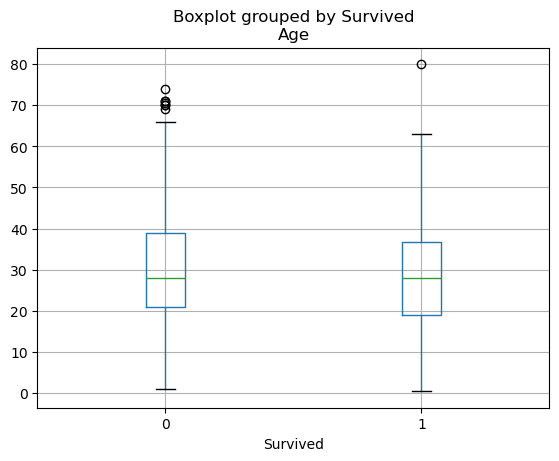

In [ ]:
# Quickly visualize interesting variables
titanic_df.boxplot(column='Age', by='Survived')

<Axes: title={'center': 'Age'}, xlabel='Pclass'>

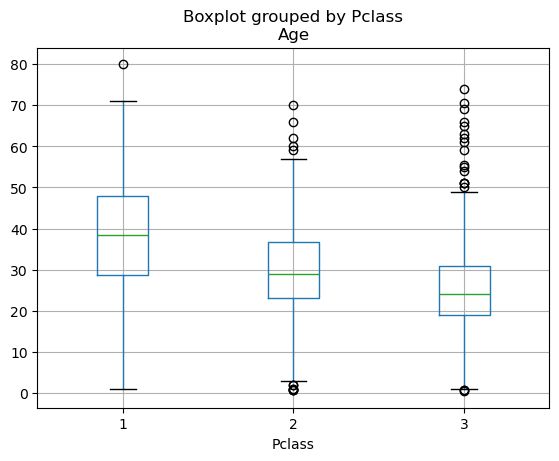

In [28]:
titanic_df.boxplot(column='Age', by='Pclass')

In [37]:
# We can select portions of the DataFrame using the .loc method
df_filtered = titanic_df.loc[titanic_df.Age > 30]
df_filtered

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
...,...,...,...,...,...,...,...,...
869,0,3,Mr. Victor Vander Cruyssen,male,47.0,0,0,9.0000
875,1,1,Mrs. Thomas Jr (Lily Alexenia Wilson) Potter,female,56.0,0,1,83.1583
877,0,3,Mr. Johann Markun,male,33.0,0,0,7.8958
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250


In [38]:
# And get only the columns we want
df_filtered = titanic_df.loc[titanic_df.Age > 30, ['Sex', 'Age', 'Survived']]
df_filtered

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
4,male,35.0,0
6,male,54.0,0
11,female,58.0,1
...,...,...,...
869,male,47.0,0
875,female,56.0,1
877,male,33.0,0
881,female,39.0,0


In [39]:
# Or filter with multiple conditions
df_filtered = titanic_df.loc[(titanic_df.Age > 30) & (titanic_df.Pclass == 1), ['Sex', 'Age', 'Survived']]
df_filtered

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
11,female,58.0,1
30,male,40.0,0
...,...,...,...
858,female,48.0,1
863,male,31.0,0
867,female,47.0,1
868,male,33.0,0


## To-Do
Plot a histogram with 10 bins of the Fare price, for adult passengers (>=18), separated by class.

Use pandas' built-in function `.hist`

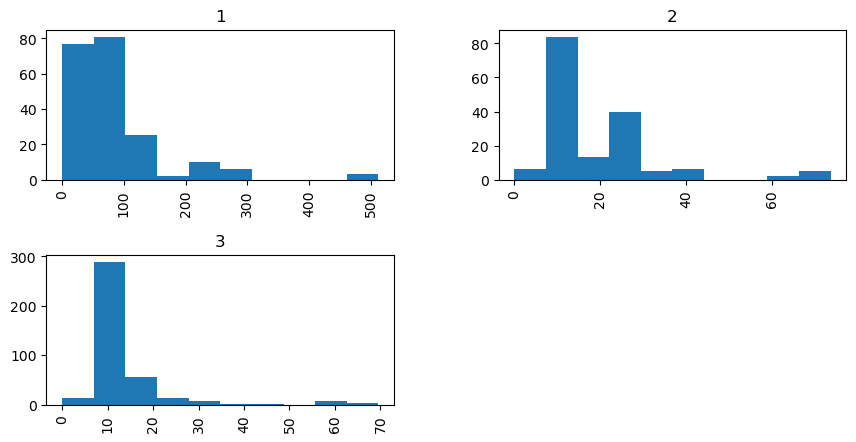

In [56]:
titanic_df['IsUnderaged'] = titanic_df['Age'] < 18
df_filtered = titanic_df.loc[(~titanic_df.IsUnderaged)]
df_filtered.hist(column='Fare', bins=10, figsize=(10, 5), by='Pclass')
plt.show()

# 3. Improve plotting capabilities with Seaborn

For histograms, we can use a high-level plot [`sns.displot`](https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-histograms)

In [ ]:
# sns.set(style='whitegrid')
# sns.set_palette('pastel')
sns.set_theme()

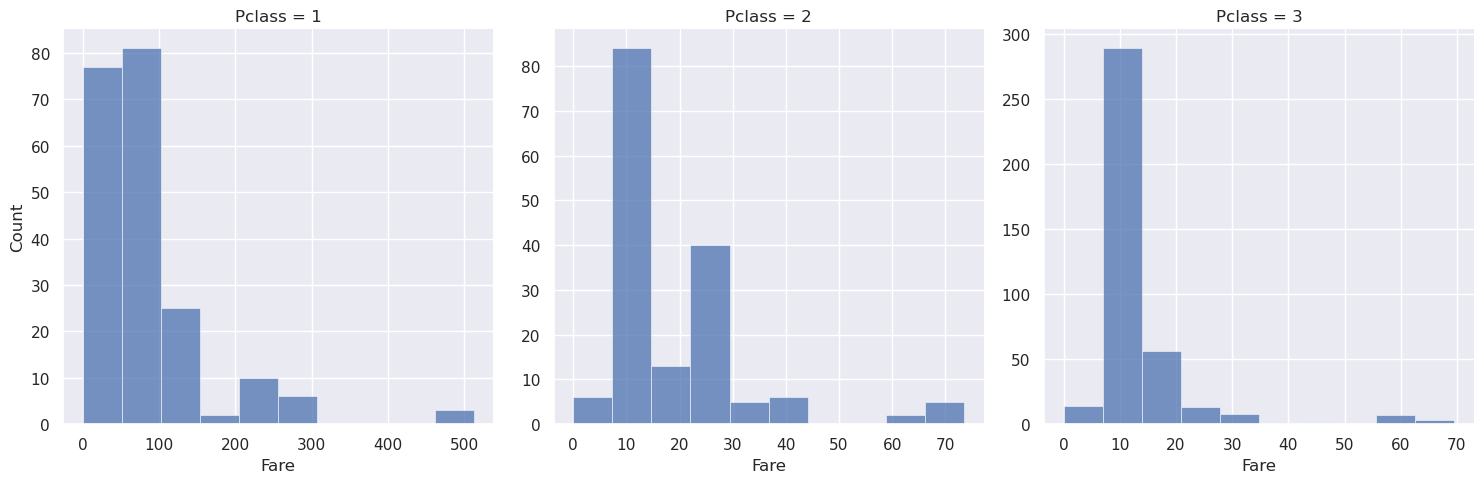

In [73]:
sns.displot(df_filtered, x='Fare', col='Pclass', bins=10, common_bins=False, facet_kws={'sharex': False, 'sharey': False})
plt.show()

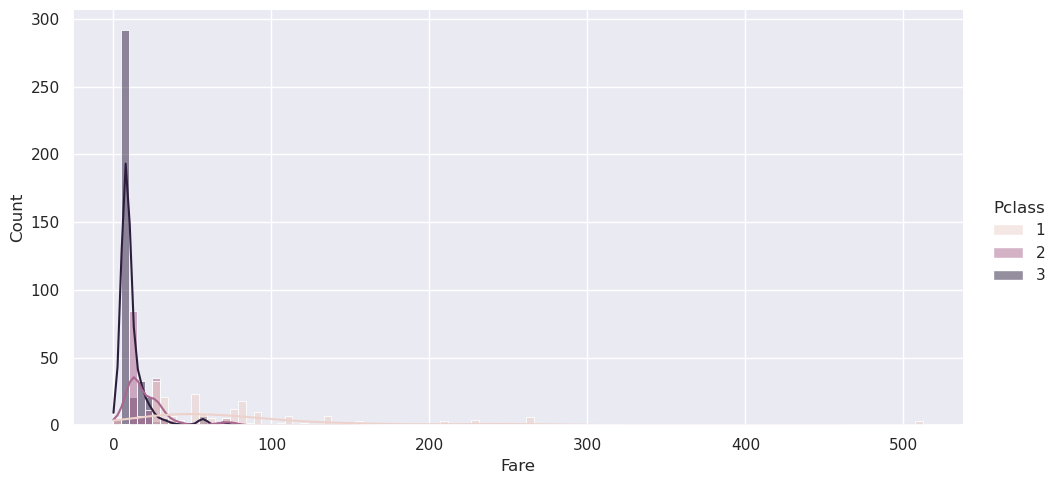

In [ ]:
# Or plot on the same axis
sns.displot(df_filtered, x='Fare', hue='Pclass', height=5, aspect=2, kde=True)
plt.show()

### Tip:
If you want to quickly adapt the theme settings to the context where you will use the plot, you can scale the plot elements with [`sns.set_context()`](https://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements)

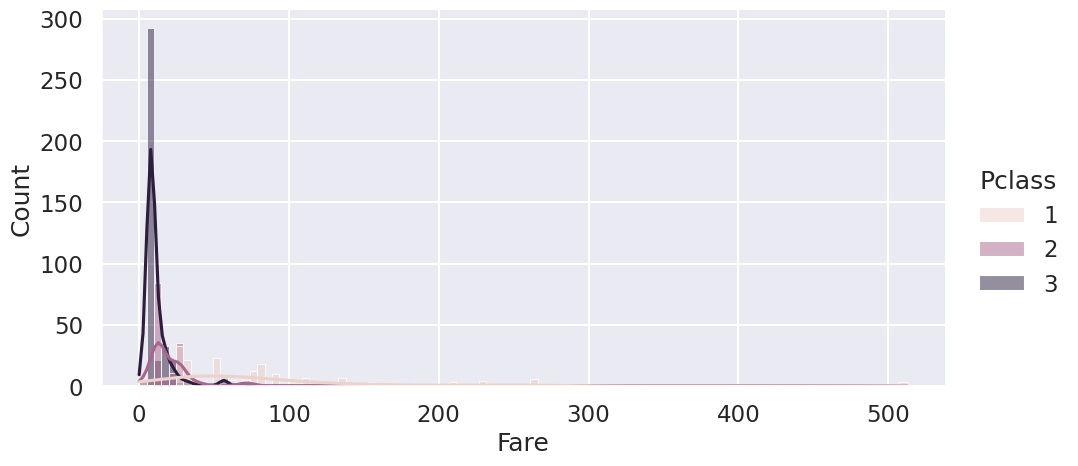

In [ ]:
sns.set_context('talk') # paper, notebook, talk, poster
sns.displot(df_filtered, x='Fare', hue='Pclass', height=5, aspect=2, kde=True)
plt.show()

# 4. More advanced statistical plotting
Seaborn also allows us to work with [statistical graphics](https://seaborn.pydata.org/tutorial/introduction.html#a-high-level-api-for-statistical-graphics).

You can use `relplot()` that uses scatter (default) and line plots. It can automatically compute and display descriptive statistics (confidence intervals, error bars). Or if you want to plot a regression line use `lmplot()`.